# Analyse Uber April 2014 Data

In [1]:
%pylab inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn 

Populating the interactive namespace from numpy and matplotlib


### Load CSV file into memory

In [2]:
data = pd.read_csv('uber-raw-data-apr14.csv')

In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [6]:
dt = '4/30/2014 23:22:00'

In [7]:
dt = pd.to_datetime(dt)

In [8]:
dt.month_name()

'April'

### Convert datetime and add some useful columns

In [9]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [10]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [11]:
def get_dom(dt):
    return dt.day
data['DoM'] = data['Date/Time'].map(get_dom)

In [12]:
data.tail()

,Date/Time,Lat,Lon,Base,DoM
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [13]:
def get_weekday(dt):
    return dt.weekday()
data['Weekday'] = data['Date/Time'].map(get_weekday)

In [14]:
def get_hour(dt):
    return dt.hour
data['Hour'] = data['Date/Time'].map(get_hour)

## Data Analysis

#### Analyze the DoM

Text(0.5, 1.0, 'Frequency by Day of Month-April 2014')

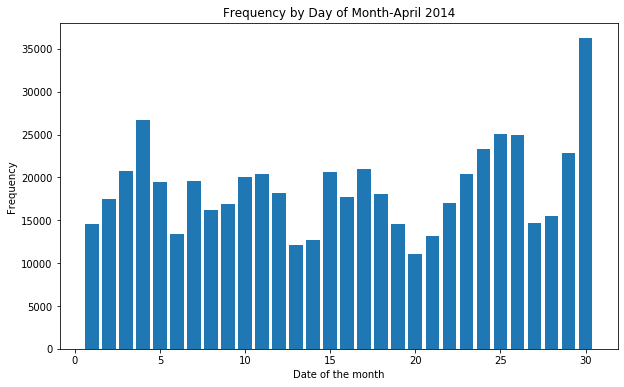

In [15]:
figure(figsize =(10,6))
hist(data.DoM, bins = 30, rwidth = 0.8, range =(0.5, 30.5))
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by Day of Month-April 2014')

In [16]:
## information about histogram

for k, rows in data.groupby('DoM'):
    print(k, len(rows))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [17]:
## information of histogram using pandas

def count_rows(rows):
    return len(rows)

In [18]:
by_date = data.groupby('DoM').apply(count_rows)

In [19]:
by_date

DoM
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

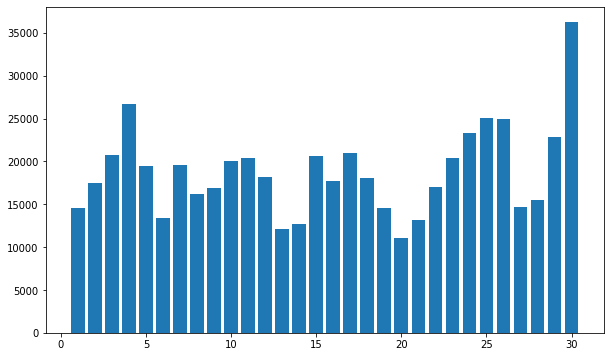

In [20]:
figure(figsize =(10,6))
bar(range(1,31), by_date)

Text(0.5, 1.0, 'Frequency by Hour of Day-April 2014')

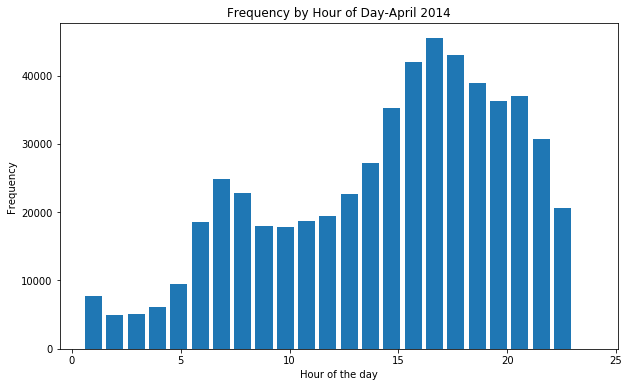

In [21]:
figure(figsize =(10,6))
hist(data.Hour, bins = 24, rwidth = 0.8, range =(.5, 24))
xlabel('Hour of the day')
ylabel('Frequency')
title('Frequency by Hour of Day-April 2014')

([<matplotlib.axis.XTick at 0x163acf07148>,
 <a list of 7 Text xticklabel objects>)

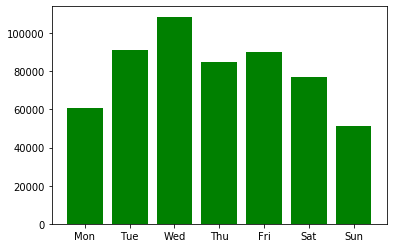

In [22]:
hist(data.Weekday, bins = 7, rwidth = .8, range = (-.5, 6.5),color = 'green')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

### Cross analysis (hour, DoM)

In [23]:
by_cross = data.groupby('Weekday Hour'.split()).apply(count_rows).unstack()

In [24]:
by_cross

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


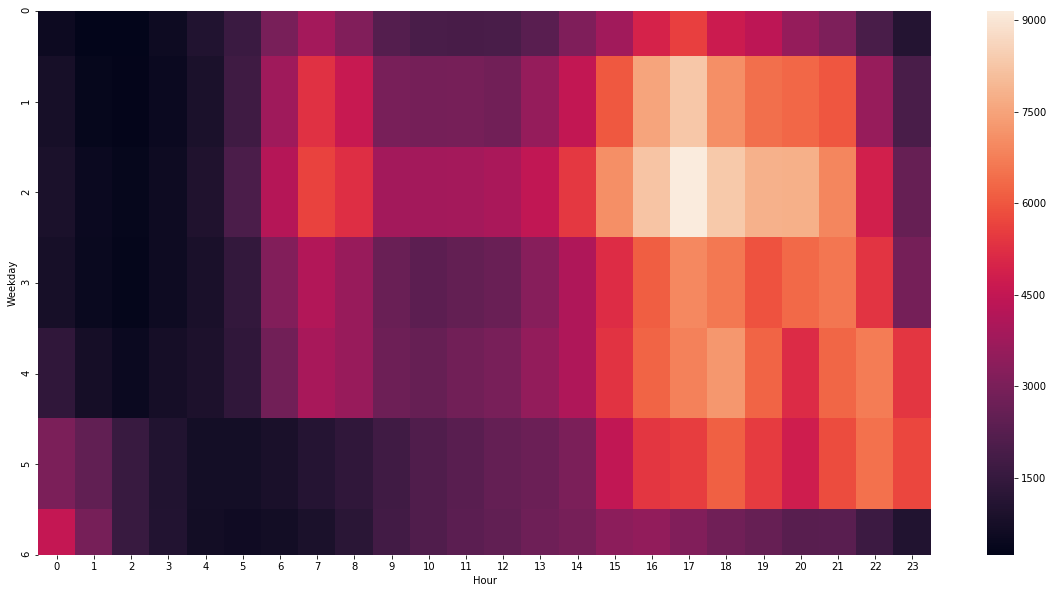

In [25]:
figure(figsize =(20,10))
seaborn.heatmap(by_cross)

### By lat and lon

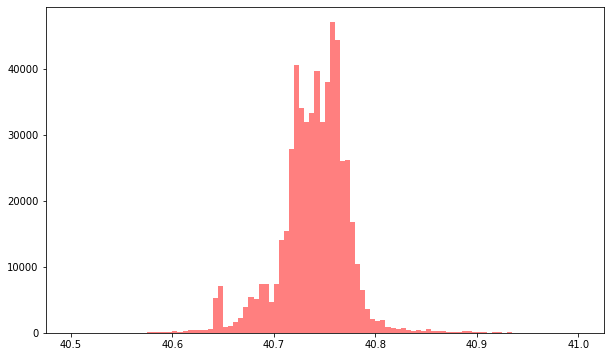

In [26]:
figure(figsize =(10,6))
hist(data['Lat'], bins =100, range=(40.5,41), alpha = 0.5,color = 'r');

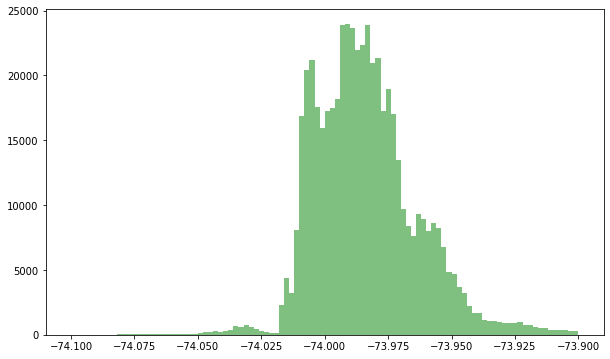

In [27]:
figure(figsize =(10,6))
hist(data['Lon'], bins =100, range=(-74.1, -73.9), color= 'g', alpha = 0.5);

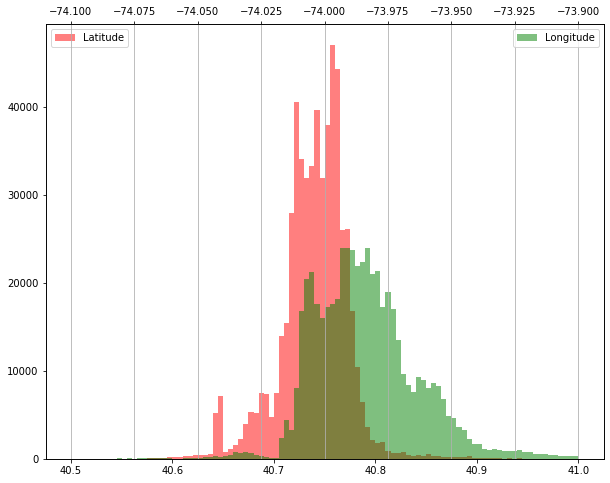

In [28]:
figure(figsize =(10,8))
hist(data['Lat'], bins =100, range=(40.5,41), color = 'r', alpha = 0.5, label = 'Latitude')
legend(loc = 'upper left')
twiny()
hist(data['Lon'], bins =100, range=(-74.1, -73.9), color = 'g', alpha = 0.5, label ='Longitude')
grid()
legend(loc='best');

(40.2, 41.5)

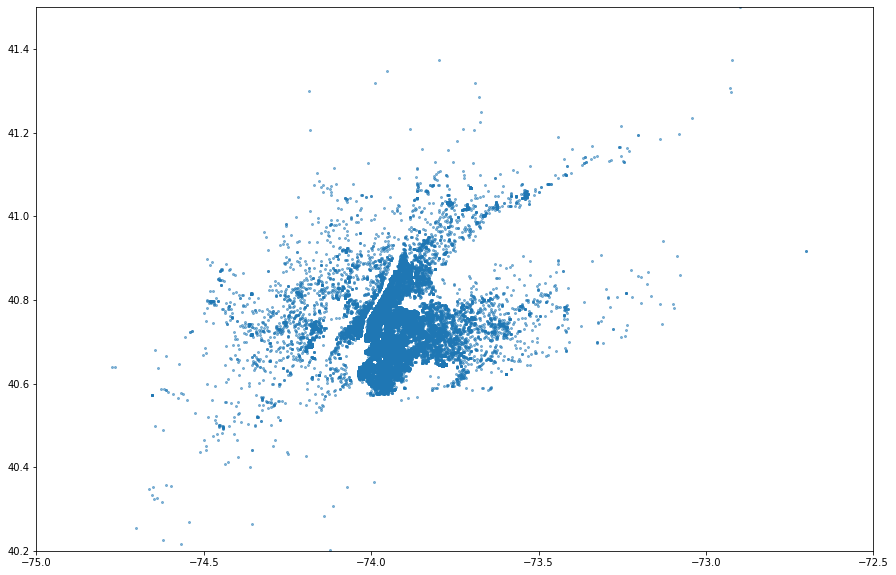

In [29]:
figure(figsize =(15,10))
plot(data['Lon'], data['Lat'], '.', ms = 4, alpha = 0.5)
xlim(-75,-72.5)
ylim(40.2, 41.5)
